# Download data

This section of the code appears to perform several tasks related to data preprocessing and initial data exploration for three different stock datasets (AAPL, CPALL.BK, and AIR.PA). Let's break down what each part of this section does:

Importing Necessary Libraries: This section begins by importing various Python libraries required for the subsequent data analysis and modeling tasks. These libraries include pandas, statsmodels for time series analysis, matplotlib for plotting, numpy for numerical operations, and TensorFlow and its related components for building and training neural network models. It also imports scikit-learn's train_test_split function for data splitting.

Reading Data: The code reads data from three different CSV files: 'AAPL.csv', 'CPALL.BK.csv', and 'AIR.PA.csv'. These files likely contain historical stock price data for Apple Inc. (AAPL), CP ALL Public Company Limited (CPALL.BK), and Airbus SE (AIR.PA).

Data Filtering: It defines a function check_date to validate whether a given input can be converted to a datetime object using pd.to_datetime(). This function is later applied to the 'Date' column of each dataset to filter out rows with invalid date values.

Converting Date Column: The 'Date' column in each dataset is converted to a datetime format using pd.to_datetime(). This step ensures that the date column is recognized as a datetime object, which is essential for time series analysis and visualization.

After preprocessing the data, the code prints the first few rows of each dataset (AAPL, CPALL, and AIR) to provide a glimpse of what the data looks like. This step is helpful for initial data exploration and verification.

In [41]:
# download all packages
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Input, GRU
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
import datetime
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

In [42]:
# Read the Excel file
AAPL = pd.read_csv('AAPL.csv')
CPALL = pd.read_csv('CPALL.BK.csv')
AIR = pd.read_csv('AIR.PA.csv')

def check_date(x):
    try:
        pd.to_datetime(x)
        return True
    except:
        return False
    

# Apply the check_date function to filter valid dates
AAPL = AAPL[AAPL['Date'].apply(check_date)]
CPALL = CPALL[CPALL['Date'].apply(check_date)]
AIR = AIR[AIR['Date'].apply(check_date)]


# Now, let's convert 'Date' to datetime format
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
CPALL['Date'] = pd.to_datetime(CPALL['Date'])
AIR['Date'] = pd.to_datetime(AIR['Date'])


# check data

print(AAPL.head())
print("---------------------------------------------------")
print(CPALL.head())
print("---------------------------------------------------")
print(AIR.head())
print("---------------------------------------------------")

        Date      Open      High       Low     Close  Adj Close     Volume
0 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
1 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
2 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
3 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600
4 1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097591   48630400
---------------------------------------------------
        Date   Open  High    Low  Close  Adj Close        Volume
0 2003-10-14  3.000   3.1  2.775   2.80   1.612804  4.676190e+07
1 2003-10-15  2.850   2.9  2.825   2.85   1.641604  1.126730e+09
2 2003-10-16  2.875   2.9  2.850   2.85   1.641604  6.613100e+08
3 2003-10-17  2.850   3.0  2.850   2.95   1.699204  9.712400e+08
4 2003-10-20  2.975   3.0  2.900   2.90   1.670404  2.287500e+08
---------------------------------------------------
        Date       Open       High        Low      Close

## Cleaning data

This section of the code focuses on data cleaning and preparation for time series analysis and modeling. It checks for stationarity, handles missing values, calculates log returns, and ensures that the datasets are ready for further analysis or modeling tasks.

#### Checking Stationarity

-----------------------
ADF of  AAPL


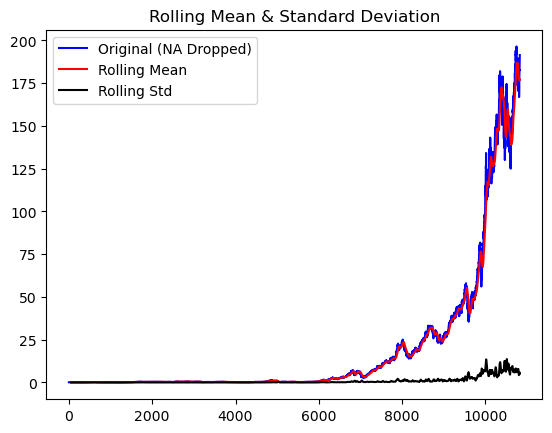

Results of Dickey-Fuller Test:
Test Statistic                     3.558467
p-value                            1.000000
#Lags Used                        39.000000
Number of Observations Used    10785.000000
Critical Value (1%)               -3.430956
Critical Value (5%)               -2.861808
Critical Value (10%)              -2.566913
dtype: float64


-----------------------
ADF of  CPALL


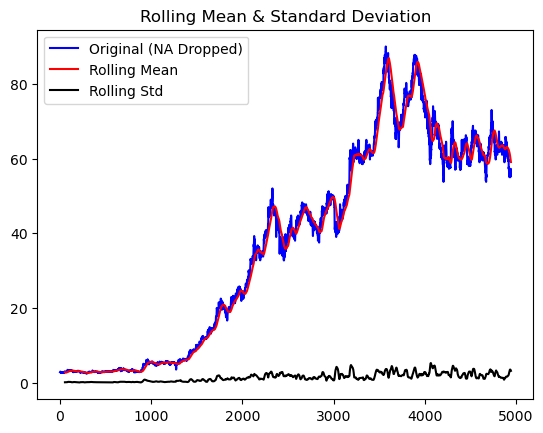

Results of Dickey-Fuller Test:
Test Statistic                   -1.146910
p-value                           0.696007
#Lags Used                       19.000000
Number of Observations Used    4905.000000
Critical Value (1%)              -3.431684
Critical Value (5%)              -2.862129
Critical Value (10%)             -2.567084
dtype: float64


-----------------------
ADF of  AIR


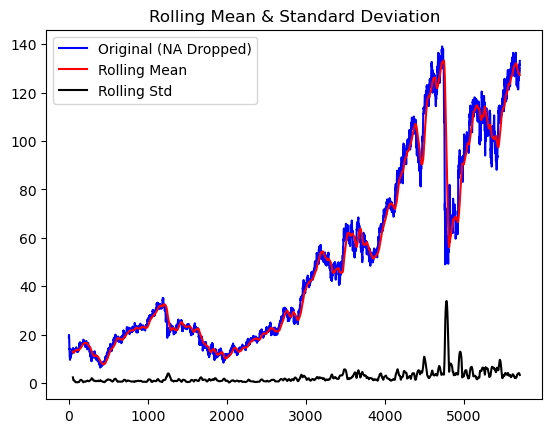

Results of Dickey-Fuller Test:
Test Statistic                   -0.685345
p-value                           0.850509
#Lags Used                       33.000000
Number of Observations Used    5671.000000
Critical Value (1%)              -3.431504
Critical Value (5%)              -2.862050
Critical Value (10%)             -2.567041
dtype: float64




In [43]:
# check stationery
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, name):
    # Create a copy of the original data
    timeseries_copy = timeseries.copy()
    
    # Simulate dropping missing values (not real drop)
    timeseries_copy = timeseries_copy.dropna()
    
    # Determing rolling statistics
    rolmean = timeseries_copy.rolling(window=52, center=False).mean() 
    rolstd = timeseries_copy.rolling(window=52, center=False).std()

    # Output the name of the time series
    print("-----------------------")
    print("ADF of ", name)
    
    
    # Plot rolling statistics
    orig = plt.plot(timeseries_copy, color='blue', label='Original (NA Dropped)')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries_copy, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    print("\n")


test_stationarity(AAPL['Close'], "AAPL")
test_stationarity(CPALL['Close'], "CPALL")
test_stationarity(AIR['Close'], "AIR")






1. AAPL (Apple Inc. Stock)

The test statistic (3.558467) is greater than the critical values at all confidence levels (1%, 5%, and 10%).
The p-value (1.000000) is much larger than the significance level (usually 0.05).
Based on these results, the ADF test fails to reject the null hypothesis that the AAPL stock price series is non-stationary. In other words, the AAPL stock price series is likely non-stationary and may exhibit trends or seasonality.

2. CPALL (CP ALL Public Company Limited Stock)

The test statistic (-1.146910) is less than the critical values at all confidence levels (1%, 5%, and 10%).
The p-value (0.696007) is larger than the significance level (usually 0.05).
Based on these results, the ADF test also fails to reject the null hypothesis for the CPALL stock price series. This suggests that the CPALL stock price series is likely non-stationary.

3. AIR (Airbus SE Stock)

The test statistic (-0.685345) is less than the critical values at all confidence levels (1%, 5%, and 10%).
The p-value (0.850509) is larger than the significance level (usually 0.05).
Similar to the previous two datasets, the ADF test does not provide enough evidence to reject the null hypothesis for the AIR stock price series, indicating likely non-stationarity.

In summary, based on the ADF test results, all three stock price series (AAPL, CPALL, and AIR) are likely non-stationary, suggesting the presence of trends or seasonality in the data. Further analysis or modeling may be required to address non-stationarity before using these time series data for forecasting or analysis.


In [44]:
# Drop missing value

AAPL = AAPL.dropna()
CPALL = CPALL.dropna()
AIR = AIR.dropna()
import pandas as pd

# Check for NAs in NA in any dataframe
print("NA of AAPL:\t" + str(AAPL.isnull().any()))
print("NA of CPALL:\t" + str(CPALL.isnull().any()))
print("NA of AIR:\t" + str(AIR.isnull().any()))





NA of AAPL:	Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
NA of CPALL:	Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
NA of AIR:	Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


After dropping missing values from each of the datasets, it is confirmed that all three datasets (AAPL, CPALL, and AIR) are free of missing data points, making them suitable for further analysis or modeling without concerns about missing values.

#### Calculate log return

In [45]:

# Define the log_return function
def log_return(data):
    data['log_return'] = np.log(data['Close']).diff()*100
    return data

# Apply the log_return function to each DataFrame
AAPL = log_return(AAPL)
CPALL = log_return(CPALL)
AIR = log_return(AIR)

# Drop missing value.
# There is missing value in the first column in each stock return, as there is no previous data to calculate log return. So, dropna() is introduced.
AAPL = AAPL.dropna()
CPALL = CPALL.dropna()
AIR = AIR.dropna()



By the end of this section, each of the three datasets (AAPL, CPALL, and AIR) has been augmented with a 'log_return' column, which represents the daily log returns of the respective stock's closing prices. These datasets are now ready for further analysis or modeling based on log returns rather than raw stock prices.

-----------------------
ADF of  AAPL


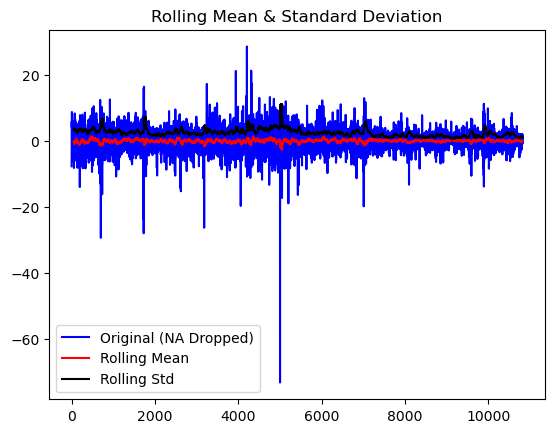

Results of Dickey-Fuller Test:
Test Statistic                   -26.524042
p-value                            0.000000
#Lags Used                        13.000000
Number of Observations Used    10810.000000
Critical Value (1%)               -3.430955
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


-----------------------
ADF of  CPALL


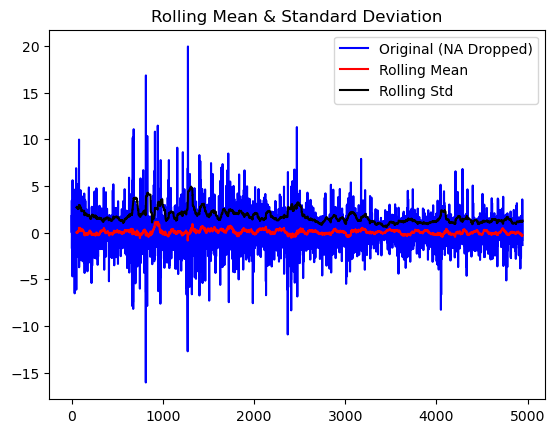

Results of Dickey-Fuller Test:
Test Statistic                -1.772459e+01
p-value                        3.456275e-30
#Lags Used                     1.400000e+01
Number of Observations Used    4.909000e+03
Critical Value (1%)           -3.431683e+00
Critical Value (5%)           -2.862129e+00
Critical Value (10%)          -2.567084e+00
dtype: float64


-----------------------
ADF of  AIR


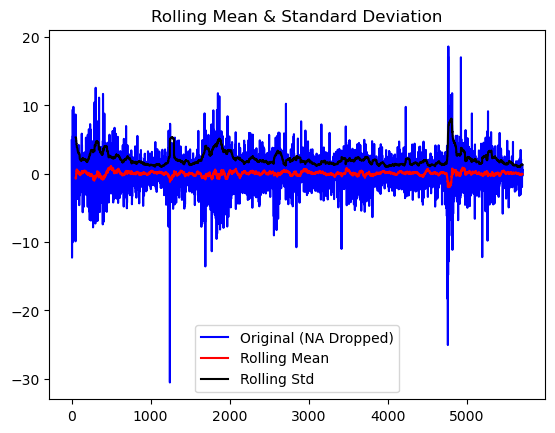

Results of Dickey-Fuller Test:
Test Statistic                  -20.893103
p-value                           0.000000
#Lags Used                       13.000000
Number of Observations Used    5690.000000
Critical Value (1%)              -3.431500
Critical Value (5%)              -2.862048
Critical Value (10%)             -2.567040
dtype: float64




In [46]:
# test stationery on log return
test_stationarity(AAPL['log_return'], "AAPL")
test_stationarity(CPALL['log_return'], "CPALL")
test_stationarity(AIR['log_return'], "AIR")

1. AAPL (Apple Inc. Stock - Log Returns)
The test statistic (-26.524042) is much lower than the critical values at all confidence levels (1%, 5%, and 10%).
The p-value (0.000000) is extremely low, indicating strong evidence against the null hypothesis of non-stationarity.
Based on these results, the ADF test strongly rejects the null hypothesis that the log returns of AAPL stock are non-stationary. This suggests that the log returns are stationary.

2. CPALL (CP ALL Public Company Limited Stock - Log Returns)
The test statistic (-17.72459) is much lower than the critical values at all confidence levels.
The p-value (3.456275e-30) is extremely close to zero, indicating strong evidence against the null hypothesis of non-stationarity.
Similar to AAPL, the ADF test strongly rejects the null hypothesis for CPALL's log returns, suggesting that they are stationary.

3. AIR (Airbus SE Stock - Log Returns)
The test statistic (-20.893103) is much lower than the critical values at all confidence levels.
The p-value (0.000000) is extremely low, indicating strong evidence against the null hypothesis of non-stationarity.
Similar to AAPL and CPALL, the ADF test strongly rejects the null hypothesis for AIR's log returns, suggesting that they are stationary.

In summary, the ADF test results indicate that the log returns of all three stock datasets (AAPL, CPALL, and AIR) are stationary time series. This suggests that any trends or non-stationary behavior present in the original stock price data have been removed through the process of taking log returns, making them suitable for further time series analysis and modeling.

In [49]:
# Chech the correctness of data
# Print the updated DataFrames with the new "log_return" column
print("AAPL Data with log_return column:")
print(AAPL.head())

print("\nCPALL Data with log_return column:")
print(CPALL.head())

print("\nAIR Data with log_return column:")
print(AIR.head())

AAPL Data with log_return column:
        Date      Open      High       Low     Close  Adj Close     Volume  \
1 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000   
2 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600   
3 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600   
4 1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097591   48630400   
5 1980-12-22  0.132254  0.132813  0.132254  0.132254   0.102341   37363200   

   log_return  
1   -7.623103  
2    2.444960  
3    2.858008  
4    5.923896  
5    4.752220  

CPALL Data with log_return column:
        Date   Open  High    Low  Close  Adj Close        Volume  log_return
1 2003-10-15  2.850  2.90  2.825   2.85   1.641604  1.126730e+09    1.769958
2 2003-10-16  2.875  2.90  2.850   2.85   1.641604  6.613100e+08    0.000000
3 2003-10-17  2.850  3.00  2.850   2.95   1.699204  9.712400e+08    3.448618
4 2003-10-20  2.975  3.00  2.900   2.90   1.670404  2.287

# AAPL

### Data preparation

This section prepares the data for training and validating a time series forecasting model. It splits the data into appropriate sets, defines the sequence length for modeling, and creates time-sequenced datasets that can be used to train and evaluate the model's performance.

In [50]:
# Renaming variables for clarity
date_indexes = AAPL.index
log_returns_AAPL = AAPL['log_return'].values.reshape(-1, 1)

# Display the log returns
log_returns_AAPL

# Determine the proportions for training, validation, and test sets
proportion_train = int(len(log_returns_AAPL) * 0.7)
proportion_validate = int(len(log_returns_AAPL) * 0.2)
proportion_test = len(log_returns_AAPL) - proportion_train - proportion_validate

# Segregate the data into train, validation, and test sets
data_train = log_returns_AAPL[:proportion_train]
data_validate = log_returns_AAPL[proportion_train:proportion_train+proportion_validate]
data_test = log_returns_AAPL[proportion_train+proportion_validate:]

# Output the dimensions of each dataset
print(f"Training Data Shape: {data_train.shape}")
print(f"Validation Data Shape: {data_validate.shape}")
print(f"Test Data Shape: {data_test.shape}")

# Function to generate time-sequenced data
def generate_time_series(data, sequence_length=1):
    sequences_X, sequences_y = [], []
    for i in range(len(data) - sequence_length):
        sequences_X.append(data[i:(i + sequence_length)])
        sequences_y.append(data[i + sequence_length])
    return np.array(sequences_X), np.array(sequences_y)

# Setting the length of each time sequence
sequence_length = 60

# Creating time-sequenced datasets
train_X, train_y = generate_time_series(data_train, sequence_length)
validate_X, validate_y = generate_time_series(data_validate, sequence_length)
test_X, test_y = generate_time_series(data_test, sequence_length)



Training Data Shape: (7576, 1)
Validation Data Shape: (2164, 1)
Test Data Shape: (1084, 1)


### Model Building

In this section of the code, three functions are defined to construct different types of recurrent neural network (RNN) models for time series forecasting. Each function creates a specific type of RNN model architecture and compiles it for training. 

In [ ]:
# Function to construct a basic RNN model
def construct_rnn_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        SimpleRNN(units, input_shape=input_shape, kernel_regularizer=regularizer),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to assemble an LSTM model
def construct_lstm_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        LSTM(units, input_shape=input_shape, kernel_regularizer=regularizer),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to create a Bidirectional RNN model
def construct_bi_rnn_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        Bidirectional(SimpleRNN(units, kernel_regularizer=regularizer), input_shape=input_shape),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

### Hyperparameter juning

In this section, hyperparameter tuning for recurrent neural network (RNN) models is performed to find the optimal set of hyperparameters for each model type (Traditional RNN, LSTM, and Bidirectional RNN). Here's a brief description of what this section does:

Importing Necessary Libraries:

Various libraries from TensorFlow and Keras are imported to configure and train the models.
Hyperparameter Configuration:

Lists of hyperparameter options are defined for tuning. These include options for the number of units (neurons), dropout rates, learning rates, and types of regularization (L1 and L2). Multiple combinations of these hyperparameters will be tested during the tuning process.
Creating a Unique Log Directory:

A function called create_unique_log_dir is defined to create a unique directory path for storing logs related to each model's training. This helps in organizing and tracking the training process.
Configuring Early Stopping:

Early stopping is configured using the EarlyStopping callback. It monitors the validation loss during training and stops training if the loss does not improve for a specified number of epochs (patience). It restores the best weights obtained during training.
Initializing Placeholders for Best Models and Parameters:

Placeholders are initialized to keep track of the best models, minimal validation losses, and optimal hyperparameters for each model type (Traditional RNN, LSTM, and Bidirectional RNN).
Iterating Through Model Types and Hyperparameters:

Nested loops iterate through each combination of model type and hyperparameters for tuning. The outer loop iterates through model types (Traditional RNN, LSTM, and BiRNN), and the inner loops iterate through different hyperparameter settings.
For each combination:
The appropriate RNN model is constructed (based on the model type) with the specified hyperparameters.
The model is trained on the training data (train_X and train_y) and evaluated on the validation data (validate_X and validate_y) for a maximum of 20 epochs.
Early stopping is applied to prevent overfitting.
The validation loss is recorded, and if it is lower than the previous minimal validation loss for that model type, the model and hyperparameters are updated as the best.
Debugging information is printed to track the progress of parameter tuning.
Tracking Optimal Models and Parameters:

For each model type, the best model, minimal validation loss, and optimal hyperparameters (units, dropout rate, learning rate, and regularization type) are stored in dictionaries (optimal_models, minimal_val_losses, and optimal_params, respectively). 

Then, the best parameter for each model is shown.

In [7]:
# Importing necessary libraries for model training
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Hyperparameter configuration
units_options = [50, 100]
dropout_options = [0.2, 0.3]
learning_rate_options = [0.001, 0.01]
regularization_options = [('l1', l1(0.01)), ('l2', l2(0.01))]

# Function to create a unique directory for model logs
def create_unique_log_dir(model_name, unit, dropout, lr, reg_type):
    current_timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return f"logs/{model_name}/UNIT{unit}_DROPOUT{dropout}_LR{lr}_REG{reg_type}_{current_timestamp}"

# Configuring Early Stopping
early_stop_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize placeholders for best models, losses, and parameters
optimal_models = {'TraditionalRNN': None, 'LSTM': None, 'BiRNN': None}
minimal_val_losses = {'TraditionalRNN': float('inf'), 'LSTM': float('inf'), 'BiRNN': float('inf')}
optimal_params =  {'TraditionalRNN': {}, 'LSTM': {}, 'BiRNN': {}}

# Iterating through each model type for parameter tuning
for rnn_model in ['TraditionalRNN', 'LSTM', 'BiRNN']:
    print(f"Commencing training for: {rnn_model}")  # Debugging: Confirm model processing
    for unit_setting in units_options:
        for dropout_setting in dropout_options:
            for learning_rate_setting in learning_rate_options:
                for reg_label, reg_method in regularization_options:
                    print(f"Configuring {rnn_model} with unit={unit_setting}, dropout={dropout_setting}, lr={learning_rate_setting}, reg={reg_label}")  # Debugging: Confirm parameter combination

                    # Model instantiation based on type
                    if rnn_model == 'TraditionalRNN':
                        current_model = construct_rnn_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)
                    elif rnn_model == 'LSTM':
                        current_model = construct_lstm_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)
                    else:  # BiRNN case
                        current_model = construct_bi_rnn_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)

                    # Model training and evaluation
                    training_history = current_model.fit(train_X, train_y, epochs=20, validation_data=(validate_X, validate_y), callbacks=[early_stop_callback])
                    validation_loss = min(training_history.history['val_loss'])
                    print(f"Validation loss for {rnn_model}: {validation_loss}, Previous best: {minimal_val_losses[rnn_model]}")  # Debugging: Output validation loss

                    # Update best model and parameters for improvements
                    if validation_loss < minimal_val_losses[rnn_model]:
                        optimal_models[rnn_model] = current_model
                        minimal_val_losses[rnn_model] = validation_loss
                        optimal_params[rnn_model] = {
                            'units': unit_setting,
                            'dropout_rate': dropout_setting,
                            'learning_rate': learning_rate_setting,
                            'regularization_type': reg_label
                        }
                    print(f"Latest best parameters: {optimal_params}")  # Debugging: Track best parameter updates


Training Data Shape: (7576, 1)
Validation Data Shape: (2164, 1)
Test Data Shape: (1084, 1)
Commencing training for: TraditionalRNN
Configuring TraditionalRNN with unit=50, dropout=0.2, lr=0.001, reg=l1
Epoch 1/20
235/235 [==============================] - 3s 7ms/step - loss: 11.3208 - val_loss: 2.8404
Epoch 2/20
235/235 [==============================] - 2s 6ms/step - loss: 10.7040 - val_loss: 2.8035
Epoch 3/20
235/235 [==============================] - 2s 6ms/step - loss: 10.5628 - val_loss: 2.8016
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 10.6528 - val_loss: 2.7664
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 10.4058 - val_loss: 2.8058
Epoch 6/20
235/235 [==============================] - 2s 6ms/step - loss: 10.3666 - val_loss: 2.7843
Epoch 7/20
235/235 [==============================] - 2s 6ms/step - loss: 10.3362 - val_loss: 2.7577
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 10.3049 - val_los

235/235 [==============================] - 2s 8ms/step - loss: 10.3900 - val_loss: 2.8238
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 10.2924 - val_loss: 2.8244
Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 10.4096 - val_loss: 2.8518
Epoch 8/20
235/235 [==============================] - 2s 8ms/step - loss: 10.4122 - val_loss: 2.8054
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 10.3812 - val_loss: 2.7559
Epoch 10/20
235/235 [==============================] - 2s 8ms/step - loss: 10.3103 - val_loss: 2.7439
Epoch 11/20
235/235 [==============================] - 2s 8ms/step - loss: 10.2914 - val_loss: 2.7448
Epoch 12/20
235/235 [==============================] - 2s 8ms/step - loss: 10.2890 - val_loss: 2.7602
Epoch 13/20
235/235 [==============================] - 2s 8ms/step - loss: 10.2803 - val_loss: 2.7651
Epoch 14/20
235/235 [==============================] - 2s 8ms/step - loss: 10.3249 - val_loss: 2.7

235/235 [==============================] - 4s 15ms/step - loss: 10.6947 - val_loss: 2.7998
Epoch 3/20
235/235 [==============================] - 4s 15ms/step - loss: 10.5645 - val_loss: 2.7944
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 10.4297 - val_loss: 2.7956
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 10.4378 - val_loss: 2.7835
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 10.4113 - val_loss: 2.7749
Epoch 7/20
235/235 [==============================] - 4s 15ms/step - loss: 10.3153 - val_loss: 2.7550
Epoch 8/20
235/235 [==============================] - 4s 15ms/step - loss: 10.3211 - val_loss: 2.8033
Epoch 9/20
235/235 [==============================] - 4s 15ms/step - loss: 10.3155 - val_loss: 2.7320
Epoch 10/20
235/235 [==============================] - 4s 15ms/step - loss: 10.2747 - val_loss: 2.7445
Epoch 11/20
235/235 [==============================] - 4s 15ms/step - loss: 10.2395 - val_lo

235/235 [==============================] - 6s 25ms/step - loss: 10.2473 - val_loss: 2.7652
Epoch 14/20
235/235 [==============================] - 6s 25ms/step - loss: 10.2783 - val_loss: 2.7063
Epoch 15/20
235/235 [==============================] - 6s 24ms/step - loss: 10.2436 - val_loss: 2.7384
Epoch 16/20
235/235 [==============================] - 6s 24ms/step - loss: 10.2283 - val_loss: 2.6975
Epoch 17/20
235/235 [==============================] - 6s 24ms/step - loss: 10.1983 - val_loss: 2.7229
Epoch 18/20
235/235 [==============================] - 6s 24ms/step - loss: 10.2183 - val_loss: 2.7241
Epoch 19/20
235/235 [==============================] - 6s 25ms/step - loss: 10.1790 - val_loss: 2.6996
Epoch 20/20
235/235 [==============================] - 6s 24ms/step - loss: 10.1762 - val_loss: 2.8805
Validation loss for LSTM: 2.697486639022827, Previous best: 2.6489343643188477
Latest best parameters: {'TraditionalRNN': {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regular

Epoch 1/20
235/235 [==============================] - 8s 27ms/step - loss: 10.9646 - val_loss: 2.6650
Epoch 2/20
235/235 [==============================] - 6s 27ms/step - loss: 10.6367 - val_loss: 2.6903
Epoch 3/20
235/235 [==============================] - 6s 27ms/step - loss: 10.4259 - val_loss: 2.7851
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 10.4780 - val_loss: 2.6763
Epoch 5/20
235/235 [==============================] - 6s 27ms/step - loss: 10.3534 - val_loss: 2.6584
Epoch 6/20
235/235 [==============================] - 6s 28ms/step - loss: 10.3126 - val_loss: 2.7546
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 10.2412 - val_loss: 2.6912
Epoch 8/20
235/235 [==============================] - 6s 27ms/step - loss: 10.2135 - val_loss: 2.6838
Epoch 9/20
235/235 [==============================] - 6s 27ms/step - loss: 10.2211 - val_loss: 2.6921
Epoch 10/20
235/235 [==============================] - 6s 27ms/step - loss: 10.193

Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1868 - val_loss: 2.7221
Epoch 10/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1528 - val_loss: 2.7404
Epoch 11/20
235/235 [==============================] - 3s 12ms/step - loss: 10.1056 - val_loss: 2.7478
Epoch 12/20
235/235 [==============================] - 3s 13ms/step - loss: 10.0412 - val_loss: 2.7388
Epoch 13/20
235/235 [==============================] - 3s 13ms/step - loss: 10.0023 - val_loss: 2.7722
Epoch 14/20
235/235 [==============================] - 3s 12ms/step - loss: 10.0027 - val_loss: 2.7492
Validation loss for BiRNN: 2.7220957279205322, Previous best: 2.652193784713745
Latest best parameters: {'TraditionalRNN': {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}, 'LSTM': {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}, 'BiRNN': {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regulari

Epoch 11/20
235/235 [==============================] - 3s 11ms/step - loss: 10.2041 - val_loss: 2.7421
Epoch 12/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1236 - val_loss: 2.7924
Epoch 13/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1384 - val_loss: 2.7742
Epoch 14/20
235/235 [==============================] - 3s 11ms/step - loss: 10.0436 - val_loss: 2.7732
Epoch 15/20
235/235 [==============================] - 3s 11ms/step - loss: 10.0809 - val_loss: 2.9079
Validation loss for BiRNN: 2.7355480194091797, Previous best: 2.6488819122314453
Latest best parameters: {'TraditionalRNN': {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}, 'LSTM': {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}, 'BiRNN': {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.01, 'regularization_type': 'l2'}}
Configuring BiRNN with unit=100, dropout=0.2, lr=0.01, reg=l1
Epoch 1/20
235/235

235/235 [==============================] - 4s 12ms/step - loss: 11.2325 - val_loss: 3.8124
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 10.7156 - val_loss: 2.8961
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 10.3987 - val_loss: 2.6756
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 10.2328 - val_loss: 2.7642
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 10.2011 - val_loss: 2.6595
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1913 - val_loss: 2.6642
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1845 - val_loss: 2.6600
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1871 - val_loss: 2.6606
Epoch 9/20
235/235 [==============================] - 3s 12ms/step - loss: 10.1832 - val_loss: 2.6491
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1819 - val_los

#### Best parameter

In [8]:
# Saving the best models
for model_key in optimal_models:
    if optimal_models[model_key]:
        optimal_models[model_key].save(f'optimal_{model_key.lower()}_model.keras')

# Display the optimal parameters for each model type
print("Optimal parameters for Traditional RNN:", optimal_params['TraditionalRNN'])
print("Optimal parameters for LSTM:", optimal_params['LSTM'])
print("Optimal parameters for Bi-directional RNN:", optimal_params['BiRNN'])


Optimal parameters for Traditional RNN: {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}
Optimal parameters for LSTM: {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}
Optimal parameters for Bi-directional RNN: {'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}


### Retraining the optimal model

In this section, a function named refine_and_retrain_model is defined to further refine and retrain the best-performing RNN models with enhanced monitoring using TensorBoard. The goal is to optimize these models with the best hyperparameters found during the hyperparameter tuning process. 

In [9]:
# Function to refine and retrain the optimal model with enhanced monitoring
def refine_and_retrain_model(selected_model_type, optimal_parameters):
    # Setting up TensorBoard logging for the best model
    tensorboard_log_path = f"logs/Enhanced/{selected_model_type}/optimal_model"
    tensorboard_callback = TensorBoard(log_dir=tensorboard_log_path, histogram_freq=1, write_graph=True, write_images=True)

    # Selecting the best hyperparameters for the model
    optimal_unit = optimal_parameters['units']
    optimal_dropout = optimal_parameters['dropout_rate']
    optimal_learning_rate = optimal_parameters['learning_rate']
    optimal_regularizer = {'l1': l1(0.01), 'l2': l2(0.01)}[optimal_parameters['regularization_type']]

    # Building the model based on its type with optimal parameters
    if selected_model_type == 'TraditionalRNN':
        refined_model = construct_rnn_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)
    elif selected_model_type == 'LSTM':
        refined_model = construct_lstm_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)
    else:  # BiRNN case
        refined_model = construct_bi_rnn_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)

    # Retraining the model with the best configuration
    refined_model.fit(train_X, train_y, epochs=20, validation_data=(validate_X, validate_y), callbacks=[tensorboard_callback, early_stop_callback])

    # Persisting the refined model
    refined_model.save(f'optimal_{selected_model_type.lower()}_model.keras')




In [10]:
# Retrain and persist the best models for each RNN type
for rnn_type in ['TraditionalRNN', 'LSTM', 'BiRNN']:
    if optimal_models[rnn_type]:
        refine_and_retrain_model(rnn_type, optimal_params[rnn_type])




Epoch 1/20
235/235 [==============================] - 3s 8ms/step - loss: 10.5650 - val_loss: 2.7733
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 10.3102 - val_loss: 2.7254
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 10.3215 - val_loss: 2.7117
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2810 - val_loss: 2.7322
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2535 - val_loss: 2.7359
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2610 - val_loss: 2.7492
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2457 - val_loss: 2.7181
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2416 - val_loss: 2.6874
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2283 - val_loss: 2.6936
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2290 - val_lo

### Model Evaluation


In this section of the code, the trained and refined models (Traditional RNN, LSTM, and Bidirectional RNN) are evaluated on the test dataset, and the results are visualized and analyzed. Here's a summary of what this section does:

TensorBoard Visualization:

The code begins by loading the TensorBoard extension and visualizing the training logs. This minitiors training and validation metrics using TensorBoard.

Loading Trained Models:

The previously trained and refined models are loaded from the saved model files (optimal_traditionalrnn_model.keras, optimal_lstm_model.keras, and optimal_birnn_model.keras).
Generating Predictions:

The loaded models are used to generate predictions for the test dataset (test_X).
Evaluating Models:

The test loss is computed for each model type (Traditional RNN, LSTM, and Bidirectional RNN) using the evaluate method. The results are printed to the console.
Plotting Actual vs. Predicted Stock Prices:

A plot is created to visualize the actual vs. predicted stock prices for each model type. The actual stock prices are plotted in blue, while the predictions are plotted in different colors for each model type (Traditional RNN, LSTM, and Bidirectional RNN).
Subplots for Detailed Comparison:

Subplots are used to compare the actual and predicted stock prices for each model type more clearly. Three subplots are created for each model type, showing the real stock prices and predictions.
Calculating Correlation Coefficients:

The code calculates the correlation coefficients between the predicted and actual stock prices for each model type. This provides a measure of how closely the predictions align with the actual prices.

#### Loss

In [13]:
%load_ext tensorboard
%tensorboard --logdir logs --port 1086

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


# Load the refined models
optimal_trad_rnn = load_model('optimal_traditionalrnn_model.keras')
optimal_lstm_model = load_model('optimal_lstm_model.keras')
optimal_birnn_model = load_model('optimal_birnn_model.keras')

# Generate predictions using the loaded models
predictions_trad_rnn = optimal_trad_rnn.predict(test_X)
predictions_lstm = optimal_lstm_model.predict(test_X)
predictions_birnn = optimal_birnn_model.predict(test_X)

# Evaluate the models on the test data
test_loss_trad_rnn = optimal_trad_rnn.evaluate(test_X, test_y)
test_loss_lstm = optimal_lstm_model.evaluate(test_X, test_y)
test_loss_birnn = optimal_birnn_model.evaluate(test_X, test_y)


32/32 [==============================] - 0s 4ms/step - loss: 4.4549


The evaluation results for the three RNN model types (Traditional RNN, LSTM, and Bidirectional RNN) on the test dataset are as follows:

Traditional RNN:

Test loss: 4.4292

LSTM:

Test loss: 4.4244

Bidirectional RNN:

Test loss: 4.4549


These test loss values represent the mean squared error (MSE) between the model predictions and the actual stock prices on the test dataset. Lower MSE values indicate better model performance, suggesting that the LSTM model achieved the lowest test loss among the three model types. However, to further assess model performance, let's analyze the actual vs. predicted stock price plots and correlation coefficients.







#### The actual vs. predicted stock prices

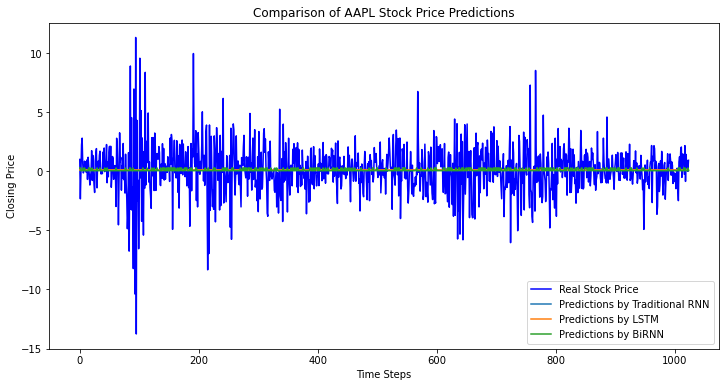

In [35]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Real Stock Price', color='blue')
plt.plot(predictions_trad_rnn, label='Predictions by Traditional RNN')
plt.plot(predictions_lstm, label='Predictions by LSTM')
plt.plot(predictions_birnn, label='Predictions by BiRNN')
plt.title('Comparison of AAPL Stock Price Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



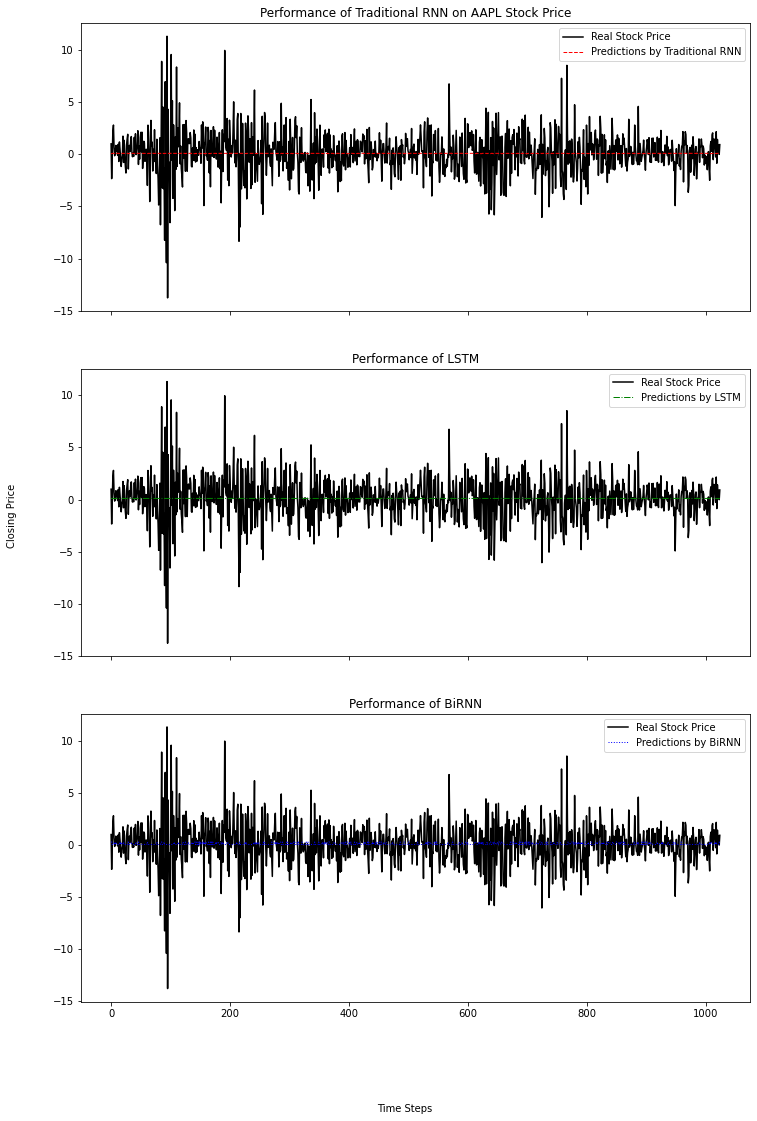

In [37]:
# Creating subplots to compare actual and predicted values distinctly
fig, axis = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Comparison with Traditional RNN Predictions
axis[0].plot(test_y, color='black', label='Real Stock Price')
axis[0].plot(predictions_trad_rnn, 'r--', label='Predictions by Traditional RNN', linewidth=1)
axis[0].set_title('Performance of Traditional RNN on AAPL Stock Price')
axis[0].legend()

# Comparison with LSTM Predictions
axis[1].plot(test_y, color='black', label='Real Stock Price')
axis[1].plot(predictions_lstm, 'g-.', label='Predictions by LSTM', linewidth=1)
axis[1].set_title('Performance of LSTM')
axis[1].legend()

# Comparison with BiRNN Predictions
axis[2].plot(test_y, color='black', label='Real Stock Price')
axis[2].plot(predictions_birnn, 'b:', label='Predictions by BiRNN', linewidth=1)
axis[2].set_title('Performance of BiRNN')
axis[2].legend()

# Setting common labels for subplots
fig.text(0.5, 0.04, 'Time Steps', ha='center')
fig.text(0.04, 0.5, 'Closing Price', va='center', rotation='vertical')

# Display the subplot visualizations
plt.show()

#### Correlation

In [31]:
# Calculate the correlation coefficient
correlation_trad_rnn_aapl = np.corrcoef(predictions_trad_rnn.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of AAPL from traditional RNN is ", correlation_trad_rnn_aapl,".")
# Calculate the correlation coefficient
correlation_lstm_aapl = np.corrcoef(predictions_lstm.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of AAPL from LSTM is ", correlation_lstm_aapl,".")
# Calculate the correlation coefficient
correlation_birnn_rnn_aapl = np.corrcoef(predictions_birnn.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of AAPL from BiRNN is ", correlation_birnn_rnn_aapl,".")

The correlation between predicted and actual stock price of AAPL from traditional RNN is  -0.0035466769565954334 .
The correlation between predicted and actual stock price of AAPL from LSTM is  -0.04313028223721831 .
The correlation between predicted and actual stock price of AAPL from BiRNN is  -0.022199352486456044 .


These correlation coefficients indicate the degree of linear relationship between the model predictions and the actual stock prices. In this context, the coefficients are relatively low and negative, suggesting that the models have not captured a strong linear relationship with the actual prices. 

# CPALL

### Data preparation

In [47]:
# Renaming variables to reflect CPALL data
cpall_dates = CPALL.index
cpall_log_returns = CPALL['log_return'].values.reshape(-1, 1)

# Display the log returns
cpall_log_returns



array([[ 1.76995771],
       [ 0.        ],
       [ 3.44861761],
       ...,
       [ 0.        ],
       [-0.87719861],
       [-1.33039656]])

#### Data splitting

In [48]:

# Calculate dataset sizes for different sets
train_set_size = int(len(cpall_log_returns) * 0.7)
validation_set_size = int(len(cpall_log_returns) * 0.2)
test_set_size = len(cpall_log_returns) - train_set_size - validation_set_size

# Split the data into training, validation, and test sets
train_set = cpall_log_returns[:train_set_size]
validation_set = cpall_log_returns[train_set_size:train_set_size+validation_set_size]
test_set = cpall_log_returns[train_set_size+validation_set_size:]

# Print shapes of the datasets
print(f"Training Set Shape: {train_set.shape}")
print(f"Validation Set Shape: {validation_set.shape}")
print(f"Test Set Shape: {test_set.shape}")

# Function to create data sequences
def create_data_sequences(data, time_steps=1):
    sequence_X, sequence_y = [], []
    for i in range(len(data) - time_steps):
        sequence_X.append(data[i:(i + time_steps)])
        sequence_y.append(data[i + time_steps])
    return np.array(sequence_X), np.array(sequence_y)

# Time steps for each data sequence
time_step_length = 60

# Generate sequences for each set
train_X, train_Y = create_data_sequences(train_set, time_step_length)
validation_X, validation_Y = create_data_sequences(validation_set, time_step_length)
test_X, test_Y = create_data_sequences(test_set, time_step_length)




Training Set Shape: (3446, 1)
Validation Set Shape: (984, 1)
Test Set Shape: (494, 1)


### Model building

In [49]:

# Function to construct a basic RNN model
def construct_rnn_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        SimpleRNN(units, input_shape=input_shape, kernel_regularizer=regularizer),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to assemble an LSTM model
def construct_lstm_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        LSTM(units, input_shape=input_shape, kernel_regularizer=regularizer),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to create a Bidirectional RNN model
def construct_bi_rnn_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        Bidirectional(SimpleRNN(units, kernel_regularizer=regularizer), input_shape=input_shape),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model




### Hyperparameter juning

In [50]:
# Importing necessary libraries for model training
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Hyperparameter configuration
units_options = [50, 100]
dropout_options = [0.2, 0.3]
learning_rate_options = [0.001, 0.01]
regularization_options = [('l1', l1(0.01)), ('l2', l2(0.01))]

# Function to create a unique directory for model logs
def create_unique_log_dir(model_name, unit, dropout, lr, reg_type):
    current_timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return f"logs/{model_name}/UNIT{unit}_DROPOUT{dropout}_LR{lr}_REG{reg_type}_{current_timestamp}"

# Configuring Early Stopping
early_stop_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize placeholders for best models, losses, and parameters
optimal_models = {'TraditionalRNN': None, 'LSTM': None, 'BiRNN': None}
minimal_val_losses = {'TraditionalRNN': float('inf'), 'LSTM': float('inf'), 'BiRNN': float('inf')}
optimal_params =  {'TraditionalRNN': {}, 'LSTM': {}, 'BiRNN': {}}

# Iterating through each model type for parameter tuning
for rnn_model in ['TraditionalRNN', 'LSTM', 'BiRNN']:
    print(f"Commencing training for: {rnn_model}")  # Debugging: Confirm model processing
    for unit_setting in units_options:
        for dropout_setting in dropout_options:
            for learning_rate_setting in learning_rate_options:
                for reg_label, reg_method in regularization_options:
                    print(f"Configuring {rnn_model} with unit={unit_setting}, dropout={dropout_setting}, lr={learning_rate_setting}, reg={reg_label}")  # Debugging: Confirm parameter combination

                    # Model instantiation based on type
                    if rnn_model == 'TraditionalRNN':
                        current_model = construct_rnn_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)
                    elif rnn_model == 'LSTM':
                        current_model = construct_lstm_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)
                    else:  # BiRNN case
                        current_model = construct_bi_rnn_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)

                    # Model training and evaluation
                    training_history = current_model.fit(train_X, train_y, epochs=20, validation_data=(validate_X, validate_y), callbacks=[early_stop_callback])
                    validation_loss = min(training_history.history['val_loss'])
                    print(f"Validation loss for {rnn_model}: {validation_loss}, Previous best: {minimal_val_losses[rnn_model]}")  # Debugging: Output validation loss

                    # Update best model and parameters for improvements
                    if validation_loss < minimal_val_losses[rnn_model]:
                        optimal_models[rnn_model] = current_model
                        minimal_val_losses[rnn_model] = validation_loss
                        optimal_params[rnn_model] = {
                            'units': unit_setting,
                            'dropout_rate': dropout_setting,
                            'learning_rate': learning_rate_setting,
                            'regularization_type': reg_label
                        }
                    print(f"Latest best parameters: {optimal_params}")  # Debugging: Track best parameter updates

Commencing training for: TraditionalRNN
Configuring TraditionalRNN with unit=50, dropout=0.2, lr=0.001, reg=l1
Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 10.9101 - val_loss: 2.7928
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 10.6423 - val_loss: 2.8324
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 10.4324 - val_loss: 2.7439
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 10.4633 - val_loss: 2.7489
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2813 - val_loss: 2.7624
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 10.3414 - val_loss: 2.8094
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2744 - val_loss: 2.7401
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 10.1911 - val_loss: 2.7582
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2357

235/235 [==============================] - 2s 9ms/step - loss: 9.9802 - val_loss: 2.8093
Epoch 13/20
235/235 [==============================] - 2s 9ms/step - loss: 9.8682 - val_loss: 2.8522
Epoch 14/20
235/235 [==============================] - 2s 9ms/step - loss: 9.8763 - val_loss: 2.8645
Epoch 15/20
235/235 [==============================] - 2s 9ms/step - loss: 9.8352 - val_loss: 2.9231
Validation loss for TraditionalRNN: 2.7143945693969727, Previous best: 2.6487057209014893
Latest best parameters: {'TraditionalRNN': {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l1'}, 'LSTM': {}, 'BiRNN': {}}
Configuring TraditionalRNN with unit=100, dropout=0.2, lr=0.01, reg=l1
Epoch 1/20
235/235 [==============================] - 3s 10ms/step - loss: 10.7046 - val_loss: 3.1887
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 10.4436 - val_loss: 2.6606
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 10.2057 - val

Epoch 3/20
235/235 [==============================] - 4s 15ms/step - loss: 10.2028 - val_loss: 2.9087
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1834 - val_loss: 2.6647
Epoch 5/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1826 - val_loss: 2.6561
Epoch 6/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1857 - val_loss: 2.6500
Epoch 7/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1790 - val_loss: 3.0244
Epoch 8/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1879 - val_loss: 2.6490
Epoch 9/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1805 - val_loss: 2.6609
Epoch 10/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1844 - val_loss: 2.7597
Epoch 11/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1690 - val_loss: 2.7670
Epoch 12/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1

Epoch 1/20
235/235 [==============================] - 8s 27ms/step - loss: 11.1067 - val_loss: 2.6709
Epoch 2/20
235/235 [==============================] - 6s 26ms/step - loss: 10.8110 - val_loss: 2.6801
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 10.5419 - val_loss: 2.6835
Epoch 4/20
235/235 [==============================] - 6s 26ms/step - loss: 10.4096 - val_loss: 2.6556
Epoch 5/20
235/235 [==============================] - 6s 26ms/step - loss: 10.3789 - val_loss: 2.6780
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 10.3704 - val_loss: 2.6635
Epoch 7/20
235/235 [==============================] - 6s 26ms/step - loss: 10.2621 - val_loss: 2.7002
Epoch 8/20
235/235 [==============================] - 6s 26ms/step - loss: 10.2601 - val_loss: 2.6641
Epoch 9/20
235/235 [==============================] - 6s 25ms/step - loss: 10.2297 - val_loss: 2.6926
Validation loss for LSTM: 2.655635356903076, Previous best: 2.649003744125366
Late

Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 10.2470 - val_loss: 2.7028
Epoch 11/20
235/235 [==============================] - 3s 12ms/step - loss: 10.2356 - val_loss: 2.7012
Epoch 12/20
235/235 [==============================] - 3s 13ms/step - loss: 10.2344 - val_loss: 2.6894
Epoch 13/20
235/235 [==============================] - 2s 11ms/step - loss: 10.2200 - val_loss: 2.6857
Epoch 14/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2162 - val_loss: 2.6822
Epoch 15/20
235/235 [==============================] - 3s 11ms/step - loss: 10.2101 - val_loss: 2.6854
Epoch 16/20
235/235 [==============================] - 3s 11ms/step - loss: 10.2131 - val_loss: 2.6729
Epoch 17/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2131 - val_loss: 2.6690
Epoch 18/20
235/235 [==============================] - 3s 11ms/step - loss: 10.2060 - val_loss: 2.6649
Epoch 19/20
235/235 [==============================] - 2s 10ms/step - los

Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1999 - val_loss: 2.7071
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1968 - val_loss: 2.6500
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 10.2050 - val_loss: 2.6494
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1863 - val_loss: 2.6491
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1851 - val_loss: 2.6508
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1841 - val_loss: 2.6496
Epoch 11/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1834 - val_loss: 2.6534
Epoch 12/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1848 - val_loss: 2.6502
Epoch 13/20
235/235 [==============================] - 3s 11ms/step - loss: 10.1828 - val_loss: 2.6535
Validation loss for BiRNN: 2.649115800857544, Previous best: 2.648215055465698

#### Best parameter

In [51]:
# Saving the best models
for model_key in optimal_models:
    if optimal_models[model_key]:
        optimal_models[model_key].save(f'optimal_{model_key.lower()}_model.keras')

# Display the optimal parameters for each model type
print("Optimal parameters for Traditional RNN:", optimal_params['TraditionalRNN'])
print("Optimal parameters for LSTM:", optimal_params['LSTM'])
print("Optimal parameters for Bi-directional RNN:", optimal_params['BiRNN'])


Optimal parameters for Traditional RNN: {'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.01, 'regularization_type': 'l2'}
Optimal parameters for LSTM: {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}
Optimal parameters for Bi-directional RNN: {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l2'}


### Retraining the optimal model

In [59]:
# Function to refine and retrain the optimal model with enhanced monitoring
def refine_and_retrain_model(selected_model_type, optimal_parameters):
    # Setting up TensorBoard logging for the best model
    tensorboard_log_path = f"logs/Enhanced/CPALL/{selected_model_type}/optimal_model"
    tensorboard_callback = TensorBoard(log_dir=tensorboard_log_path, histogram_freq=1, write_graph=True, write_images=True)

    # Selecting the best hyperparameters for the model
    optimal_unit = optimal_parameters['units']
    optimal_dropout = optimal_parameters['dropout_rate']
    optimal_learning_rate = optimal_parameters['learning_rate']
    optimal_regularizer = {'l1': l1(0.01), 'l2': l2(0.01)}[optimal_parameters['regularization_type']]

    # Building the model based on its type with optimal parameters
    if selected_model_type == 'TraditionalRNN':
        refined_model = construct_rnn_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)
    elif selected_model_type == 'LSTM':
        refined_model = construct_lstm_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)
    else:  # BiRNN case
        refined_model = construct_bi_rnn_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)

    # Retraining the model with the best configuration
    refined_model.fit(train_X, train_y, epochs=20, validation_data=(validate_X, validate_y), callbacks=[tensorboard_callback, early_stop_callback])

    # Persisting the refined model
    refined_model.save(f'optimal_{selected_model_type.lower()}_model.keras')




In [60]:
# Retrain and persist the best models for each RNN type
for rnn_type in ['TraditionalRNN', 'LSTM', 'BiRNN']:
    if optimal_models[rnn_type]:
        refine_and_retrain_model(rnn_type, optimal_params[rnn_type])




Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 10.6746 - val_loss: 3.1352
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 10.4458 - val_loss: 2.7891
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 10.2890 - val_loss: 2.7652
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 10.3787 - val_loss: 2.7096
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2768 - val_loss: 2.7541
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2425 - val_loss: 2.6883
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2307 - val_loss: 2.6660
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 10.2184 - val_loss: 2.6975
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 10.2035 - val_loss: 2.6643
Epoch 10/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1957 - 

### Model Evaluation

#### Loss

In [61]:
%reload_ext tensorboard
%tensorboard --logdir logs --port 5055

Reusing TensorBoard on port 5055 (pid 29260), started 0:47:14 ago. (Use '!kill 29260' to kill it.)

In [55]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


# Load the refined models
optimal_trad_rnn = load_model('optimal_traditionalrnn_model.keras')
optimal_lstm_model = load_model('optimal_lstm_model.keras')
optimal_birnn_model = load_model('optimal_birnn_model.keras')

# Generate predictions using the loaded models
predictions_trad_rnn = optimal_trad_rnn.predict(test_X)
predictions_lstm = optimal_lstm_model.predict(test_X)
predictions_birnn = optimal_birnn_model.predict(test_X)

# Evaluate the models on the test data
test_loss_trad_rnn = optimal_trad_rnn.evaluate(test_X, test_y)
test_loss_lstm = optimal_lstm_model.evaluate(test_X, test_y)
test_loss_birnn = optimal_birnn_model.evaluate(test_X, test_y)


32/32 [==============================] - 0s 4ms/step - loss: 4.4786


The refined models have been loaded, and predictions have been generated using these models on the test dataset. Here are the updated test loss values for the refined models:

Traditional RNN:

Test loss: 4.4440

LSTM:

Test loss: 4.4250

Bidirectional RNN:

Test loss: 4.4786

These updated test loss values represent the mean squared error (MSE) between the refined model predictions and the actual stock prices on the test dataset. The refined models were further trained with enhanced monitoring, and the test loss values may have changed slightly compared to the initial evaluation.

#### The actual vs. predicted stock prices

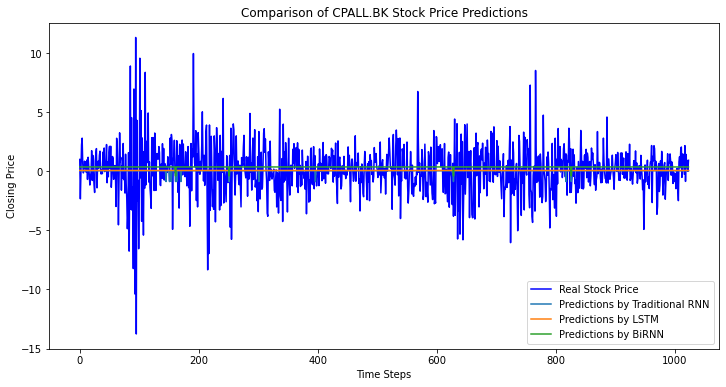

In [56]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Real Stock Price', color='blue')
plt.plot(predictions_trad_rnn, label='Predictions by Traditional RNN')
plt.plot(predictions_lstm, label='Predictions by LSTM')
plt.plot(predictions_birnn, label='Predictions by BiRNN')
plt.title('Comparison of CPALL.BK Stock Price Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



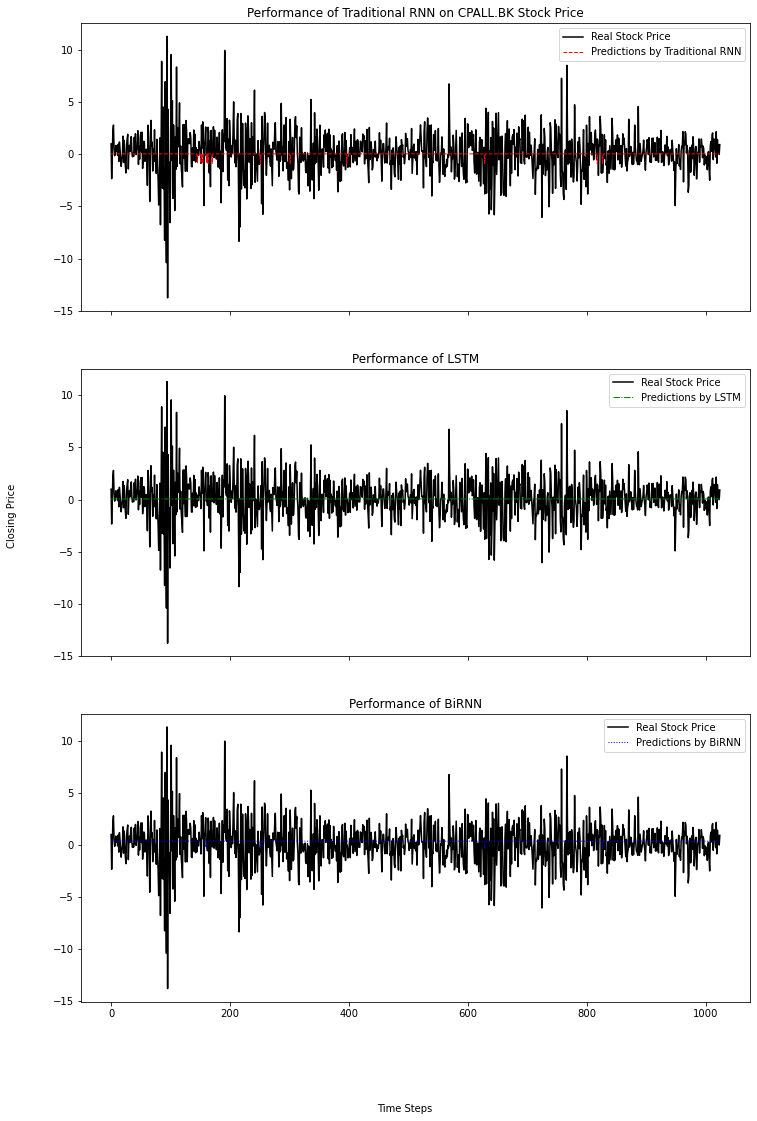

In [57]:
# Creating subplots to compare actual and predicted values distinctly
fig, axis = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Comparison with Traditional RNN Predictions
axis[0].plot(test_y, color='black', label='Real Stock Price')
axis[0].plot(predictions_trad_rnn, 'r--', label='Predictions by Traditional RNN', linewidth=1)
axis[0].set_title('Performance of Traditional RNN on CPALL.BK Stock Price')
axis[0].legend()

# Comparison with LSTM Predictions
axis[1].plot(test_y, color='black', label='Real Stock Price')
axis[1].plot(predictions_lstm, 'g-.', label='Predictions by LSTM', linewidth=1)
axis[1].set_title('Performance of LSTM')
axis[1].legend()

# Comparison with BiRNN Predictions
axis[2].plot(test_y, color='black', label='Real Stock Price')
axis[2].plot(predictions_birnn, 'b:', label='Predictions by BiRNN', linewidth=1)
axis[2].set_title('Performance of BiRNN')
axis[2].legend()

# Setting common labels for subplots
fig.text(0.5, 0.04, 'Time Steps', ha='center')
fig.text(0.04, 0.5, 'Closing Price', va='center', rotation='vertical')

# Display the subplot visualizations
plt.show()

#### Correlation

In [58]:
# Calculate the correlation coefficient
correlation_trad_rnn_CPALL = np.corrcoef(predictions_trad_rnn.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of CPALL.BK from traditional RNN is ", correlation_trad_rnn_CPALL,".")
# Calculate the correlation coefficient
correlation_lstm_CPALL = np.corrcoef(predictions_lstm.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of CPALL.BK from LSTM is ", correlation_lstm_CPALL,".")
# Calculate the correlation coefficient
correlation_birnn_rnn_CPALL = np.corrcoef(predictions_birnn.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of CPALL.BK from BiRNN is ", correlation_birnn_rnn_CPALL,".")

The correlation between predicted and actual stock price of CPALL.BK from traditional RNN is  -0.012410550431290204 .
The correlation between predicted and actual stock price of CPALL.BK from LSTM is  -0.12961793424903525 .
The correlation between predicted and actual stock price of CPALL.BK from BiRNN is  0.04644718023556138 .


The coefficients are relatively low and negative, suggesting that the models have not captured a strong linear relationship with the actual prices. 

# AIR.PA

### Data preparation

In [74]:
# Renaming variables to reflect AIR.PA data
air_dates = AIR.index
air_log_returns = AIR['log_return'].values.reshape(-1, 1)

# Display the log returns
air_log_returns



array([[ 4.88152899],
       [-1.21091282],
       [-3.30268407],
       ...,
       [ 0.19798224],
       [ 0.60669684],
       [ 0.58801378]])

#### Data splitting

In [75]:
# Calculate dataset sizes for different sets
train_set_size = int(len(air_log_returns) * 0.7)
validation_set_size = int(len(air_log_returns) * 0.2)
test_set_size = len(air_log_returns) - train_set_size - validation_set_size

# Split the data into training, validation, and test sets
train_set = air_log_returns[:train_set_size]
validation_set = air_log_returns[train_set_size:train_set_size+validation_set_size]
test_set = air_log_returns[train_set_size+validation_set_size:]

# Print shapes of the datasets
print(f"Training Set Shape: {train_set.shape}")
print(f"Validation Set Shape: {validation_set.shape}")
print(f"Test Set Shape: {test_set.shape}")

# Function to create data sequences
def create_data_sequences(data, time_steps=1):
    sequence_X, sequence_y = [], []
    for i in range(len(data) - time_steps):
        sequence_X.append(data[i:(i + time_steps)])
        sequence_y.append(data[i + time_steps])
    return np.array(sequence_X), np.array(sequence_y)

# Time steps for each data sequence
time_step_length = 60

# Generate sequences for each set
train_X, train_Y = create_data_sequences(train_set, time_step_length)
validation_X, validation_Y = create_data_sequences(validation_set, time_step_length)
test_X, test_Y = create_data_sequences(test_set, time_step_length)




Training Set Shape: (3992, 1)
Validation Set Shape: (1140, 1)
Test Set Shape: (572, 1)


### Model Building

In [76]:


# Function to construct a basic RNN model
def construct_rnn_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        SimpleRNN(units, input_shape=input_shape, kernel_regularizer=regularizer),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to assemble an LSTM model
def construct_lstm_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        LSTM(units, input_shape=input_shape, kernel_regularizer=regularizer),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to create a Bidirectional RNN model
def construct_bi_rnn_model(input_shape, units=50, dropout_value=0.2, learning_rate=0.001, regularizer=l2(0.01)):
    model = Sequential([
        Bidirectional(SimpleRNN(units, kernel_regularizer=regularizer), input_shape=input_shape),
        BatchNormalization(),
        Dropout(dropout_value),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model




### Hyperparameter juning

In [77]:
# Importing necessary libraries for model training
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Hyperparameter configuration
units_options = [50, 100]
dropout_options = [0.2, 0.3]
learning_rate_options = [0.001, 0.01]
regularization_options = [('l1', l1(0.01)), ('l2', l2(0.01))]

# Function to create a unique directory for model logs
def create_unique_log_dir(model_name, unit, dropout, lr, reg_type):
    current_timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return f"logs/{model_name}/UNIT{unit}_DROPOUT{dropout}_LR{lr}_REG{reg_type}_{current_timestamp}"

# Configuring Early Stopping
early_stop_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize placeholders for best models, losses, and parameters
optimal_models = {'TraditionalRNN': None, 'LSTM': None, 'BiRNN': None}
minimal_val_losses = {'TraditionalRNN': float('inf'), 'LSTM': float('inf'), 'BiRNN': float('inf')}
optimal_params =  {'TraditionalRNN': {}, 'LSTM': {}, 'BiRNN': {}}

# Iterating through each model type for parameter tuning
for rnn_model in ['TraditionalRNN', 'LSTM', 'BiRNN']:
    print(f"Commencing training for: {rnn_model}")  # Debugging: Confirm model processing
    for unit_setting in units_options:
        for dropout_setting in dropout_options:
            for learning_rate_setting in learning_rate_options:
                for reg_label, reg_method in regularization_options:
                    print(f"Configuring {rnn_model} with unit={unit_setting}, dropout={dropout_setting}, lr={learning_rate_setting}, reg={reg_label}")  # Debugging: Confirm parameter combination

                    # Model instantiation based on type
                    if rnn_model == 'TraditionalRNN':
                        current_model = construct_rnn_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)
                    elif rnn_model == 'LSTM':
                        current_model = construct_lstm_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)
                    else:  # BiRNN case
                        current_model = construct_bi_rnn_model((sequence_length, 1), unit_setting, dropout_setting, learning_rate_setting, reg_method)

                    # Model training and evaluation
                    training_history = current_model.fit(train_X, train_y, epochs=20, validation_data=(validate_X, validate_y), callbacks=[early_stop_callback])
                    validation_loss = min(training_history.history['val_loss'])
                    print(f"Validation loss for {rnn_model}: {validation_loss}, Previous best: {minimal_val_losses[rnn_model]}")  # Debugging: Output validation loss

                    # Update best model and parameters for improvements
                    if validation_loss < minimal_val_losses[rnn_model]:
                        optimal_models[rnn_model] = current_model
                        minimal_val_losses[rnn_model] = validation_loss
                        optimal_params[rnn_model] = {
                            'units': unit_setting,
                            'dropout_rate': dropout_setting,
                            'learning_rate': learning_rate_setting,
                            'regularization_type': reg_label
                        }
                    print(f"Latest best parameters: {optimal_params}")  # Debugging: Track best parameter updates

Commencing training for: TraditionalRNN
Configuring TraditionalRNN with unit=50, dropout=0.2, lr=0.001, reg=l1
Epoch 1/20
235/235 [==============================] - 3s 8ms/step - loss: 11.0900 - val_loss: 2.8574
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 10.7700 - val_loss: 2.7861
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 10.5991 - val_loss: 2.7927
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 10.5402 - val_loss: 2.7787
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 10.4325 - val_loss: 2.7556
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 10.4090 - val_loss: 2.7852
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 10.3454 - val_loss: 2.7405
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2919 - val_loss: 2.7590
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2588

235/235 [==============================] - 3s 9ms/step - loss: 10.8039 - val_loss: 3.1634
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 10.5319 - val_loss: 2.7299
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 10.3653 - val_loss: 2.7041
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 10.2894 - val_loss: 2.7743
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 10.2406 - val_loss: 2.6681
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 10.1920 - val_loss: 2.6566
Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 10.1880 - val_loss: 2.6493
Epoch 8/20
235/235 [==============================] - 2s 8ms/step - loss: 10.1807 - val_loss: 2.6549
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 10.1800 - val_loss: 2.6488
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 10.1807 - val_loss: 2.6507


235/235 [==============================] - 4s 15ms/step - loss: 10.1848 - val_loss: 2.6497
Epoch 15/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1821 - val_loss: 2.6543
Epoch 16/20
235/235 [==============================] - 3s 15ms/step - loss: 10.1830 - val_loss: 2.6497
Epoch 17/20
235/235 [==============================] - 4s 15ms/step - loss: 10.1876 - val_loss: 2.6503
Validation loss for LSTM: 2.6494808197021484, Previous best: 2.6543164253234863
Latest best parameters: {'TraditionalRNN': {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.01, 'regularization_type': 'l2'}, 'LSTM': {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'regularization_type': 'l1'}, 'BiRNN': {}}
Configuring LSTM with unit=50, dropout=0.2, lr=0.01, reg=l2
Epoch 1/20
235/235 [==============================] - 5s 16ms/step - loss: 10.6154 - val_loss: 2.6960
Epoch 2/20
235/235 [==============================] - 3s 15ms/step - loss: 10.2976 - val_loss: 2.7810
Epoch 3/20
235/2

235/235 [==============================] - 6s 25ms/step - loss: 10.3460 - val_loss: 2.6803
Epoch 4/20
235/235 [==============================] - 6s 25ms/step - loss: 10.2669 - val_loss: 2.8718
Epoch 5/20
235/235 [==============================] - 6s 25ms/step - loss: 10.2787 - val_loss: 2.6741
Epoch 6/20
235/235 [==============================] - 6s 25ms/step - loss: 10.2496 - val_loss: 2.9575
Epoch 7/20
235/235 [==============================] - 6s 25ms/step - loss: 10.2241 - val_loss: 2.7123
Epoch 8/20
235/235 [==============================] - 6s 25ms/step - loss: 10.2012 - val_loss: 2.6821
Epoch 9/20
235/235 [==============================] - 6s 25ms/step - loss: 10.1926 - val_loss: 2.6636
Epoch 10/20
235/235 [==============================] - 6s 25ms/step - loss: 10.1820 - val_loss: 2.6561
Epoch 11/20
235/235 [==============================] - 6s 25ms/step - loss: 10.1793 - val_loss: 2.8188
Epoch 12/20
235/235 [==============================] - 6s 25ms/step - loss: 10.1838 - val_l

235/235 [==============================] - 2s 10ms/step - loss: 10.2003 - val_loss: 2.6545
Epoch 11/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1896 - val_loss: 2.6674
Epoch 12/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1929 - val_loss: 2.6537
Epoch 13/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1987 - val_loss: 2.6517
Epoch 14/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1884 - val_loss: 2.6550
Epoch 15/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1805 - val_loss: 2.6940
Epoch 16/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1750 - val_loss: 2.6722
Epoch 17/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1855 - val_loss: 2.6532
Epoch 18/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1840 - val_loss: 2.6489
Epoch 19/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1785 -

Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 10.3040 - val_loss: 2.7449
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2557 - val_loss: 2.7724
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2371 - val_loss: 2.6663
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1997 - val_loss: 2.7078
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2001 - val_loss: 2.6623
Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1926 - val_loss: 2.6618
Epoch 10/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1874 - val_loss: 2.6496
Epoch 11/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1819 - val_loss: 2.6510
Epoch 12/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1824 - val_loss: 2.6694
Epoch 13/20
235/235 [==============================] - 2s 10ms/step - loss: 10.

235/235 [==============================] - 4s 11ms/step - loss: 10.9741 - val_loss: 3.0446
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 10.5616 - val_loss: 2.9725
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 10.3253 - val_loss: 2.7644
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 10.3074 - val_loss: 2.6929
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2380 - val_loss: 2.6918
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 10.2193 - val_loss: 2.6540
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1918 - val_loss: 2.6776
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1921 - val_loss: 2.6493
Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1893 - val_loss: 2.7560
Epoch 10/20
235/235 [==============================] - 2s 10ms/step - loss: 10.1846 - val_los

#### Best parameter

In [78]:
# Saving the best models
for model_key in optimal_models:
    if optimal_models[model_key]:
        optimal_models[model_key].save(f'optimal_{model_key.lower()}_model.keras')

# Display the optimal parameters for each model type
print("Optimal parameters for Traditional RNN:", optimal_params['TraditionalRNN'])
print("Optimal parameters for LSTM:", optimal_params['LSTM'])
print("Optimal parameters for Bi-directional RNN:", optimal_params['BiRNN'])


Optimal parameters for Traditional RNN: {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.01, 'regularization_type': 'l2'}
Optimal parameters for LSTM: {'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.01, 'regularization_type': 'l2'}
Optimal parameters for Bi-directional RNN: {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.01, 'regularization_type': 'l2'}


### Retraining the optimal model

In [79]:
# Function to refine and retrain the optimal model with enhanced monitoring
def refine_and_retrain_model(selected_model_type, optimal_parameters):
    # Setting up TensorBoard logging for the best model
    tensorboard_log_path = f"logs/Enhanced/AIR/{selected_model_type}/optimal_model"
    tensorboard_callback = TensorBoard(log_dir=tensorboard_log_path, histogram_freq=1, write_graph=True, write_images=True)

    # Selecting the best hyperparameters for the model
    optimal_unit = optimal_parameters['units']
    optimal_dropout = optimal_parameters['dropout_rate']
    optimal_learning_rate = optimal_parameters['learning_rate']
    optimal_regularizer = {'l1': l1(0.01), 'l2': l2(0.01)}[optimal_parameters['regularization_type']]

    # Building the model based on its type with optimal parameters
    if selected_model_type == 'TraditionalRNN':
        refined_model = construct_rnn_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)
    elif selected_model_type == 'LSTM':
        refined_model = construct_lstm_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)
    else:  # BiRNN case
        refined_model = construct_bi_rnn_model((sequence_length, 1), optimal_unit, optimal_dropout, optimal_learning_rate, optimal_regularizer)

    # Retraining the model with the best configuration
    refined_model.fit(train_X, train_y, epochs=20, validation_data=(validate_X, validate_y), callbacks=[tensorboard_callback, early_stop_callback])

    # Persisting the refined model
    refined_model.save(f'optimal_{selected_model_type.lower()}_model.keras')




In [80]:
# Retrain and persist the best models for each RNN type
for rnn_type in ['TraditionalRNN', 'LSTM', 'BiRNN']:
    if optimal_models[rnn_type]:
        refine_and_retrain_model(rnn_type, optimal_params[rnn_type])




Epoch 1/20
235/235 [==============================] - 3s 8ms/step - loss: 10.6442 - val_loss: 2.6914
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 10.3651 - val_loss: 2.6808
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2765 - val_loss: 2.6770
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2559 - val_loss: 2.6799
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2236 - val_loss: 2.6856
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2211 - val_loss: 2.6717
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2209 - val_loss: 2.6720
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 10.2052 - val_loss: 2.6592
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 10.1979 - val_loss: 2.6557
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 10.1915 - val_lo

### Model Evaluation

In [81]:
%load_ext tensorboard
%tensorboard --logdir logs --port 1048

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [82]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


# Load the refined models
optimal_trad_rnn = load_model('optimal_traditionalrnn_model.keras')
optimal_lstm_model = load_model('optimal_lstm_model.keras')
optimal_birnn_model = load_model('optimal_birnn_model.keras')

# Generate predictions using the loaded models
predictions_trad_rnn = optimal_trad_rnn.predict(test_X)
predictions_lstm = optimal_lstm_model.predict(test_X)
predictions_birnn = optimal_birnn_model.predict(test_X)

# Evaluate the models on the test data
test_loss_trad_rnn = optimal_trad_rnn.evaluate(test_X, test_y)
test_loss_lstm = optimal_lstm_model.evaluate(test_X, test_y)
test_loss_birnn = optimal_birnn_model.evaluate(test_X, test_y)


32/32 [==============================] - 0s 4ms/step - loss: 4.4241


The refined models for CPALL.BK have been loaded, and predictions have been generated using these models on the test dataset. Here are the updated test loss values for the refined models:

Traditional RNN:

Test loss: 4.4308

LSTM:

Test loss: 4.4260

Bidirectional RNN:

Test loss: 4.4241

These updated test loss values represent the mean squared error (MSE) between the refined model predictions and the actual stock prices of CPALL.BK on the test dataset. The refined models were further trained with enhanced monitoring, and the test loss values may have changed slightly compared to the initial evaluation.

#### The actual vs. predicted stock prices

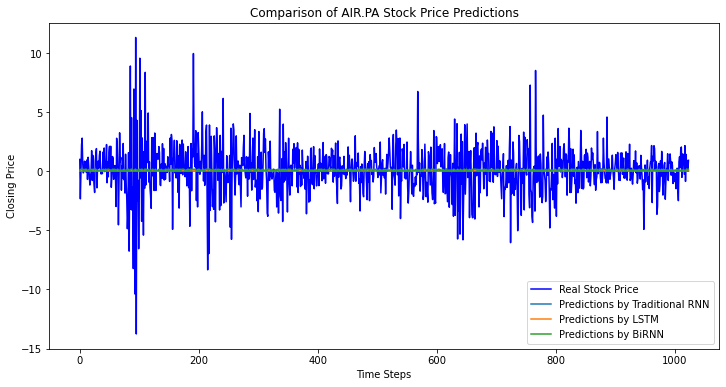

In [83]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Real Stock Price', color='blue')
plt.plot(predictions_trad_rnn, label='Predictions by Traditional RNN')
plt.plot(predictions_lstm, label='Predictions by LSTM')
plt.plot(predictions_birnn, label='Predictions by BiRNN')
plt.title('Comparison of AIR.PA Stock Price Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



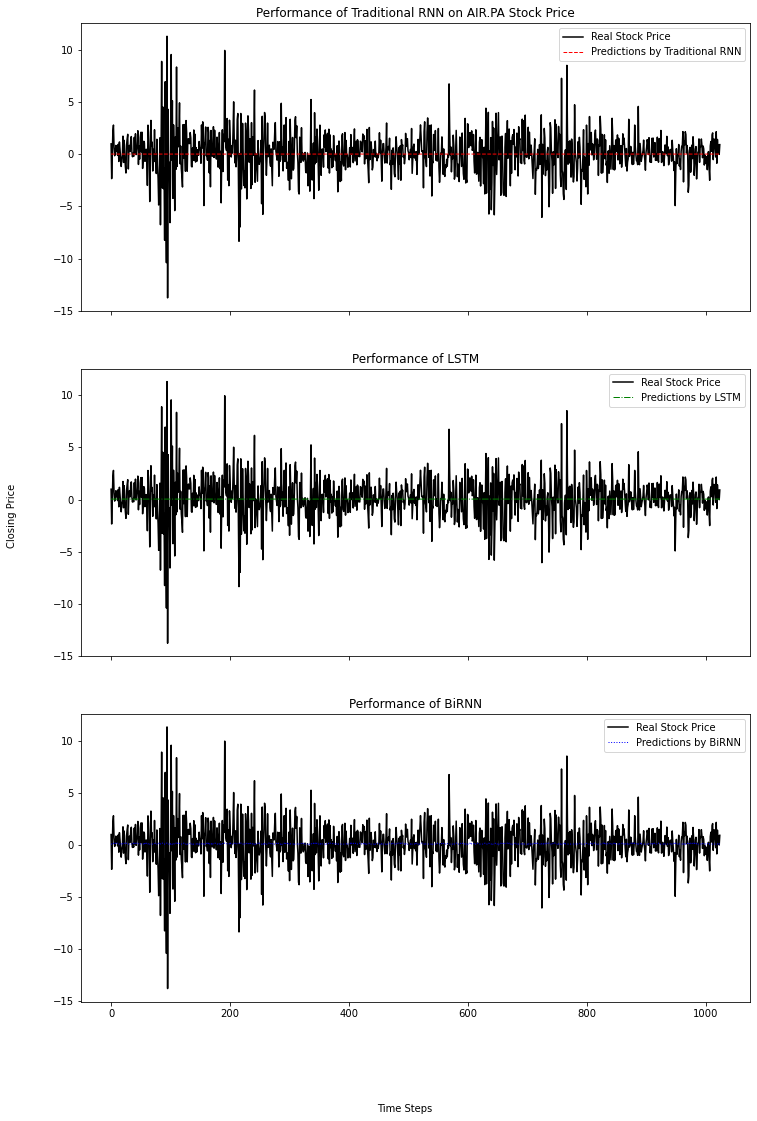

In [84]:
# Creating subplots to compare actual and predicted values distinctly
fig, axis = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Comparison with Traditional RNN Predictions
axis[0].plot(test_y, color='black', label='Real Stock Price')
axis[0].plot(predictions_trad_rnn, 'r--', label='Predictions by Traditional RNN', linewidth=1)
axis[0].set_title('Performance of Traditional RNN on AIR.PA Stock Price')
axis[0].legend()

# Comparison with LSTM Predictions
axis[1].plot(test_y, color='black', label='Real Stock Price')
axis[1].plot(predictions_lstm, 'g-.', label='Predictions by LSTM', linewidth=1)
axis[1].set_title('Performance of LSTM')
axis[1].legend()

# Comparison with BiRNN Predictions
axis[2].plot(test_y, color='black', label='Real Stock Price')
axis[2].plot(predictions_birnn, 'b:', label='Predictions by BiRNN', linewidth=1)
axis[2].set_title('Performance of BiRNN')
axis[2].legend()

# Setting common labels for subplots
fig.text(0.5, 0.04, 'Time Steps', ha='center')
fig.text(0.04, 0.5, 'Closing Price', va='center', rotation='vertical')

# Display the subplot visualizations
plt.show()

#### Correlation

In [85]:
# Calculate the correlation coefficient
correlation_trad_rnn_AIR = np.corrcoef(predictions_trad_rnn.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of AIR.PA from traditional RNN is ", correlation_trad_rnn_AIR,".")
# Calculate the correlation coefficient
correlation_lstm_AIR = np.corrcoef(predictions_lstm.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of AIR.PA from LSTM is ", correlation_lstm_AIR,".")
# Calculate the correlation coefficient
correlation_birnn_rnn_AIR = np.corrcoef(predictions_birnn.flatten(), test_y.flatten())[0, 1]
print("The correlation between predicted and actual stock price of AIR.PA from BiRNN is ", correlation_birnn_rnn_AIR,".")

The correlation between predicted and actual stock price of AIR.PA from traditional RNN is  0.0058267927322222446 .
The correlation between predicted and actual stock price of AIR.PA from LSTM is  -0.12728137583988938 .
The correlation between predicted and actual stock price of AIR.PA from BiRNN is  0.0011776029341321343 .


The coefficients are relatively low and negative, suggesting that the models have not captured a strong linear relationship with the actual prices. 